# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'NZDUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

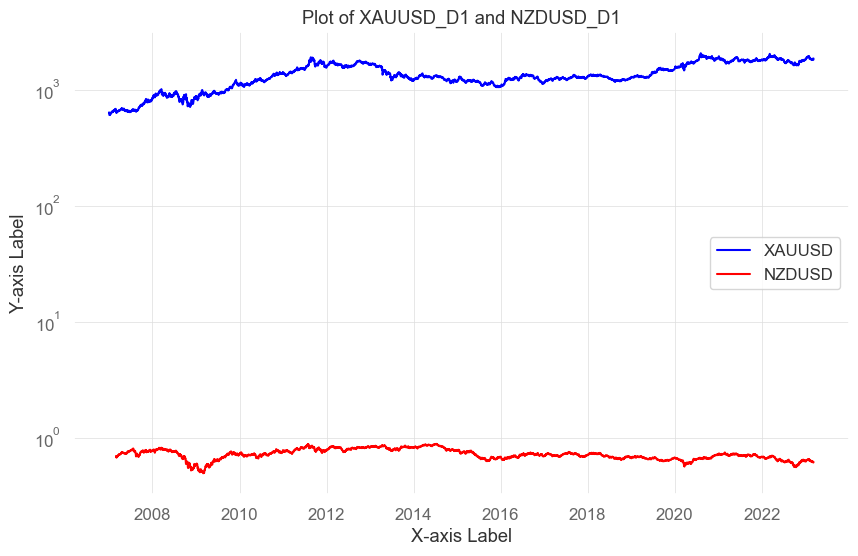

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          7.377e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:37:29   Log-Likelihood:                         -36470.
No. Observations:                5011   AIC:                                  7.294e+04
Df Residuals:                    5010   BIC:                                  7.295e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1861.0042      6.852    271.603      0.000    1847.571    1874.437
==============================================================================
Omnibus:                       73.611   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.575
Skew:                           0.199   Prob(JB):                     7.02e-14
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Save Result Backtest 

In [12]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [13]:
filename = f'{Currency_Pair}_{TF}.csv'

In [14]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -37.23%

Sharpe                     -1.39
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.14
Sortino                    -1.45
Smart Sortino              -1.19
Sortino/√2                 -1.03
Smart Sortino/√2           -0.84
Omega                      0.63

Max Drawdown               -100.0%
Longest DD Days            5727
Volatility (ann.)          34.4%
Calmar                     -0.37
Skew                       -7.52
Kurtosis                   69.78

Expected Daily %           -0.22%
Expected Monthly %         -5.45%
Expected Yearly %          -47.07%
Kelly Criterion            -28.81%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.75%
Expected Shortfall (cVaR)  -3.75%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-30,2023-03-10,5727,-99.998779,-99.998681
2,2007-05-02,2007-05-06,2007-05-13,12,-2.713239,-2.598093
3,2007-06-10,2007-06-17,2007-06-25,16,-2.491189,-2.485827
4,2007-03-04,2007-03-07,2007-03-11,8,-2.338705,-1.531612
5,2007-04-03,2007-04-06,2007-04-25,23,-1.858581,-1.772942


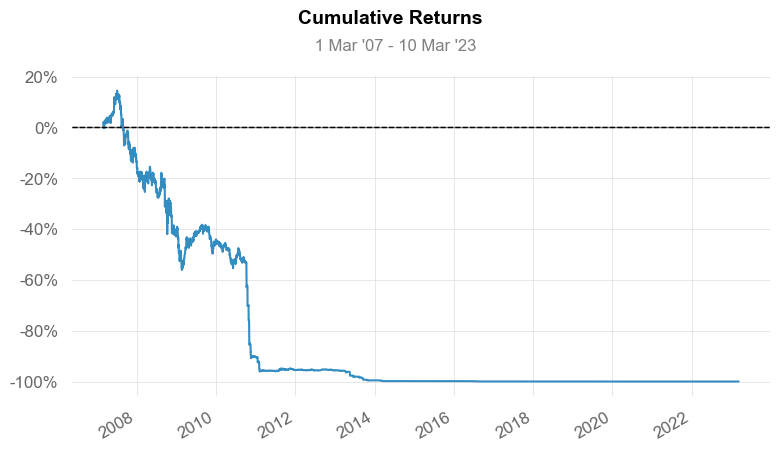

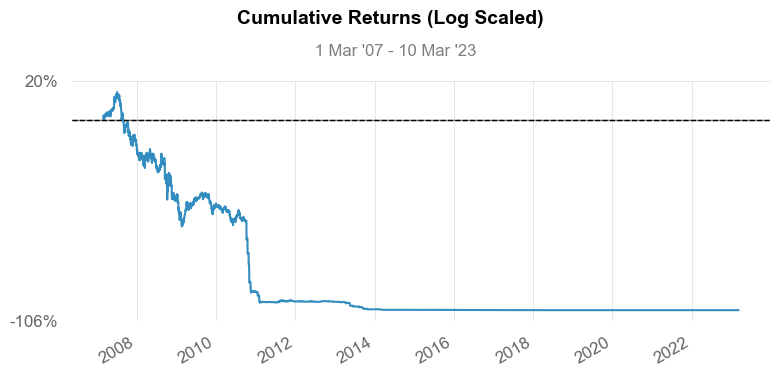

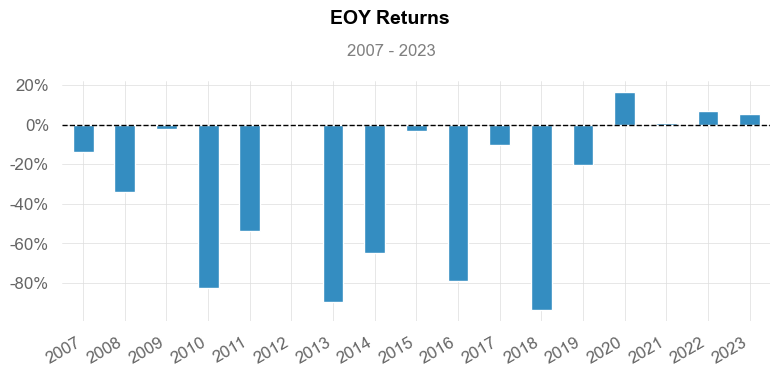

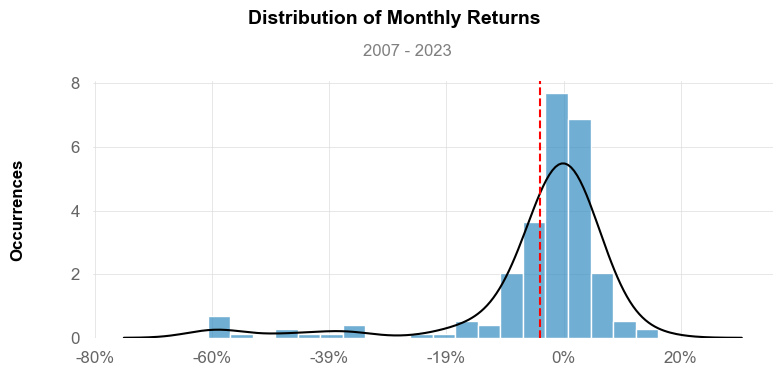

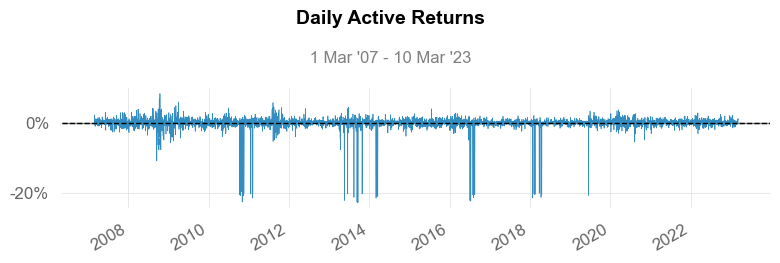

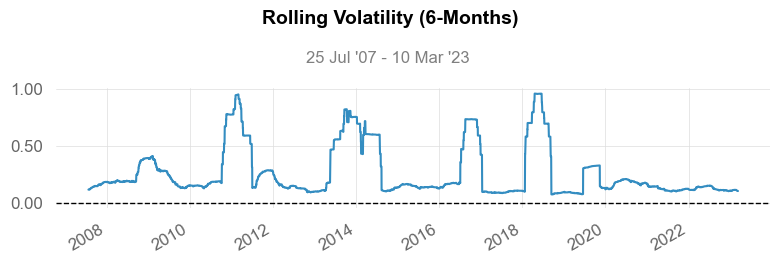

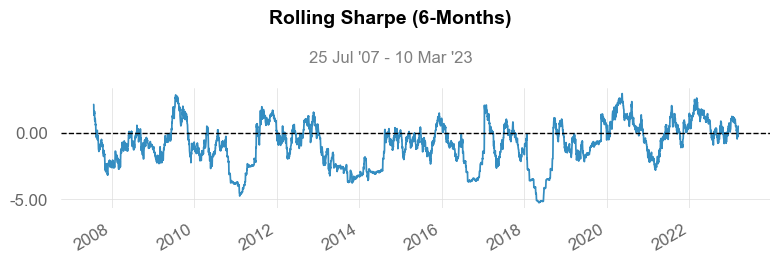

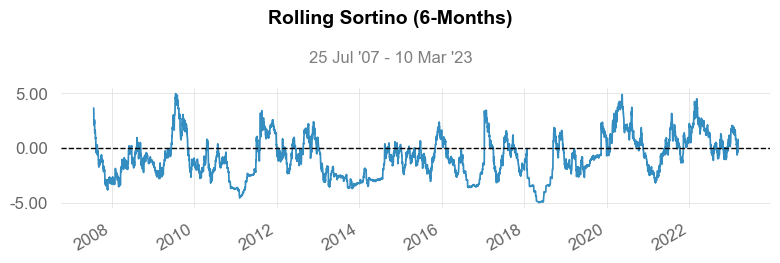

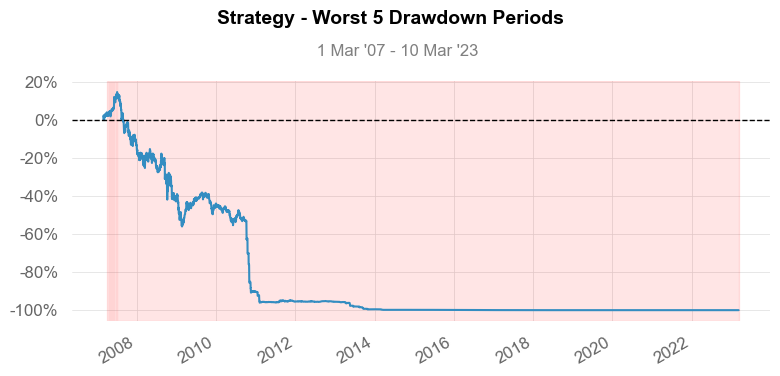

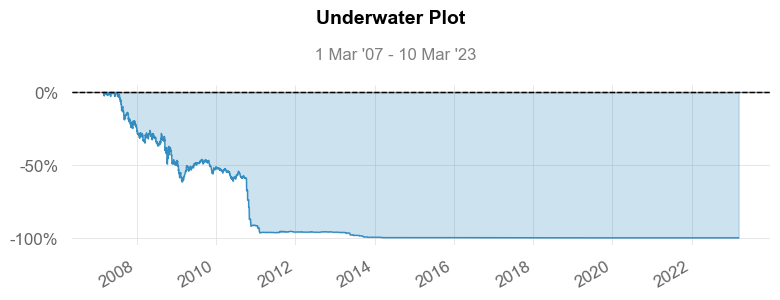

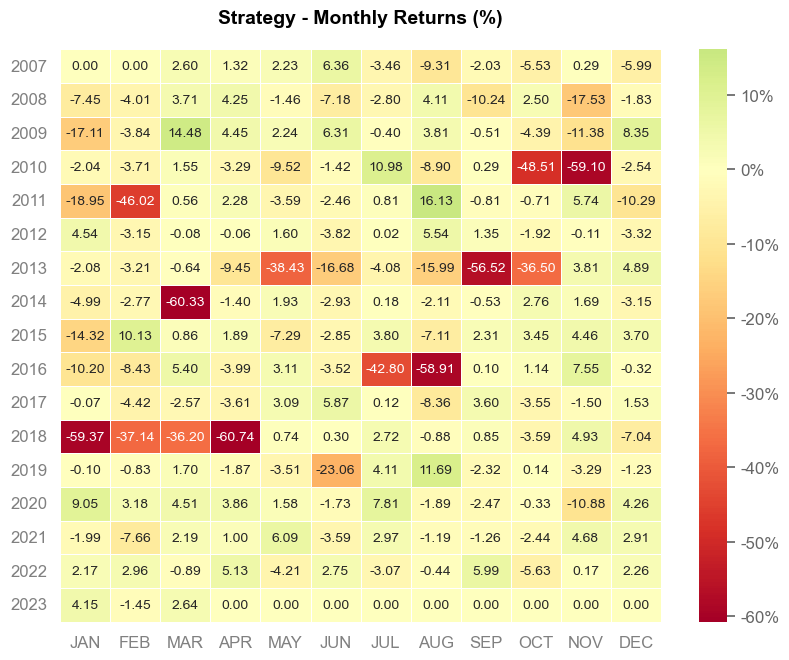

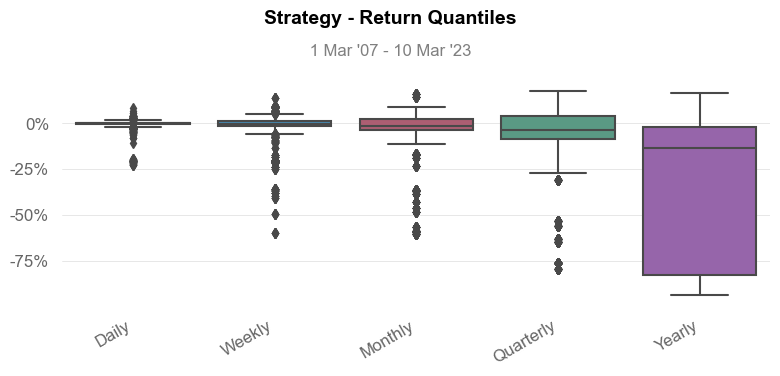

In [15]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [16]:
TF = 'H4'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

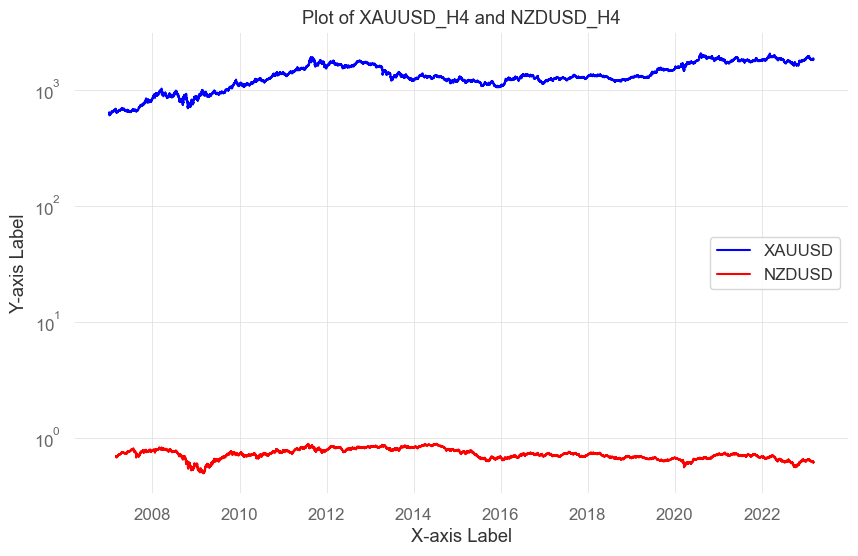

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1, data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          3.804e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:38:11   Log-Likelihood:                     -1.8812e+05
No. Observations:               25848   AIC:                                  3.763e+05
Df Residuals:                   25847   BIC:                                  3.763e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7997      3.017    616.765      0.000    1854.886    1866.713
==============================================================================
Omnibus:                      383.336   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.804
Skew:                           0.199   Prob(JB):                     1.19e-68
Kurtosis:                       2.636   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Save Result Backtest 

In [23]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [24]:
filename = f'{Currency_Pair}_{TF}.csv'

In [25]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -96.8%
CAGR﹪                     -13.78%

Sharpe                     -0.91
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.86
Sortino                    -0.93
Smart Sortino              -0.88
Sortino/√2                 -0.66
Smart Sortino/√2           -0.62
Omega                      0.63

Max Drawdown               -97.86%
Longest DD Days            5541
Volatility (ann.)          17.14%
Calmar                     -0.14
Skew                       -16.72
Kurtosis                   308.87

Expected Daily %           -0.07%
Expected Monthly %         -1.77%
Expected Yearly %          -18.33%
Kelly Criterion            -29.09%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.84%
Expected Shortfall (cVaR)  -1.84%

Max Conse

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-01-08,2019-06-14,2023-03-10,5541,-97.863950,-97.833566
2,2007-08-27,2007-09-16,2007-10-15,50,-3.725339,-3.525927
3,2007-03-13,2007-06-20,2007-08-06,147,-3.510489,-3.326490
4,2007-08-09,2007-08-15,2007-08-21,13,-2.499157,-1.405617
5,2007-10-17,2007-11-11,2007-11-21,36,-2.149367,-2.141166


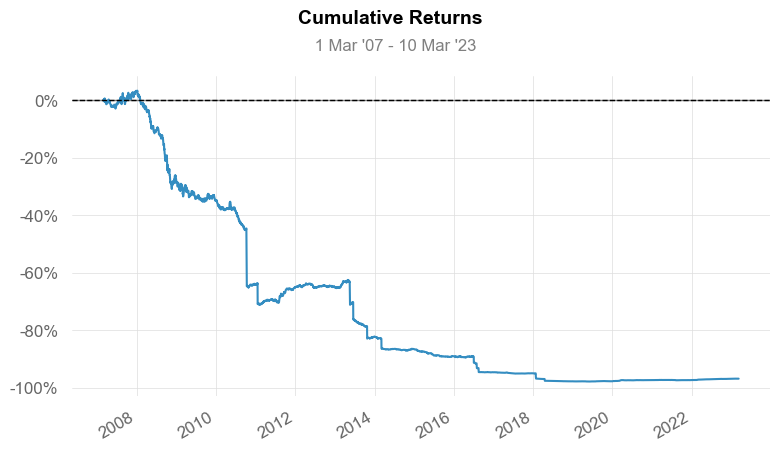

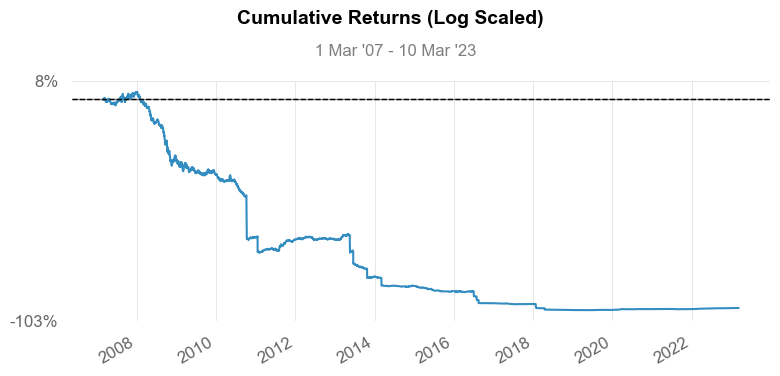

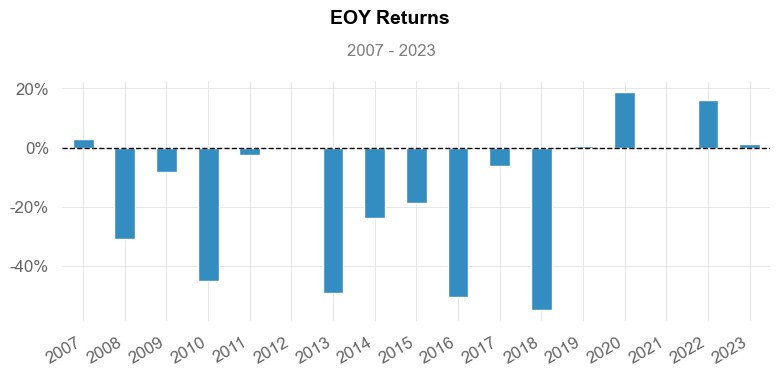

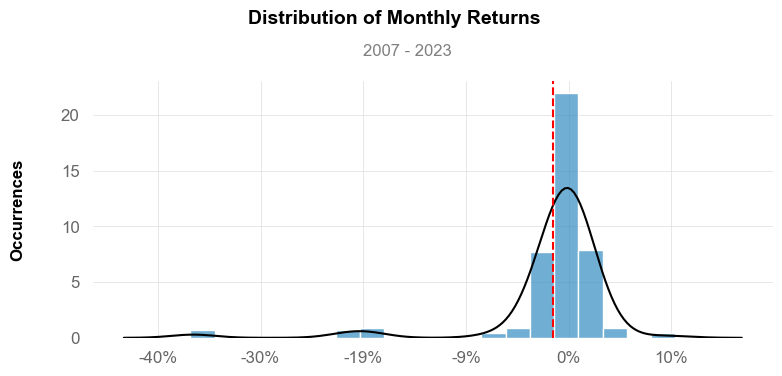

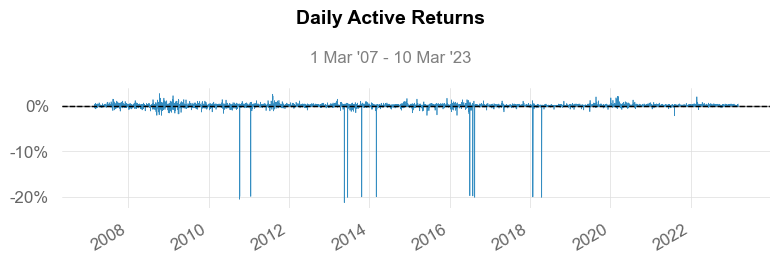

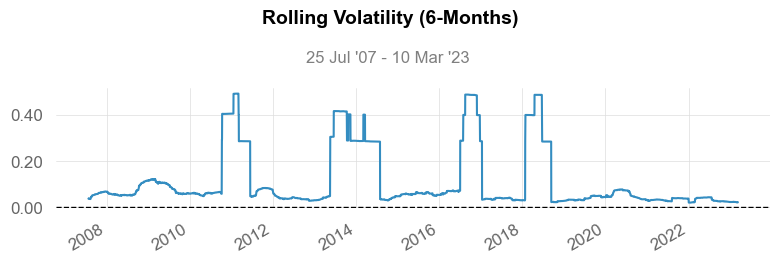

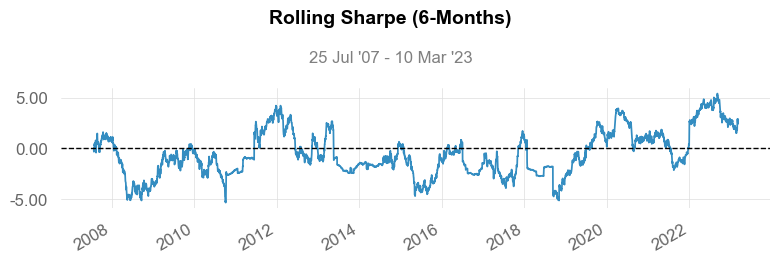

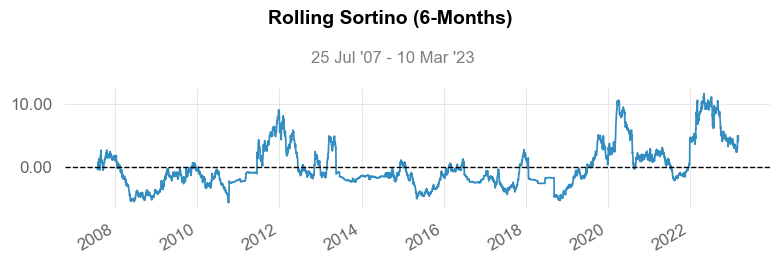

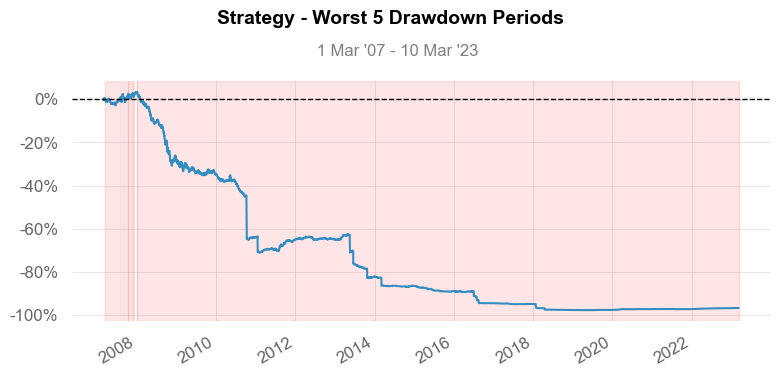

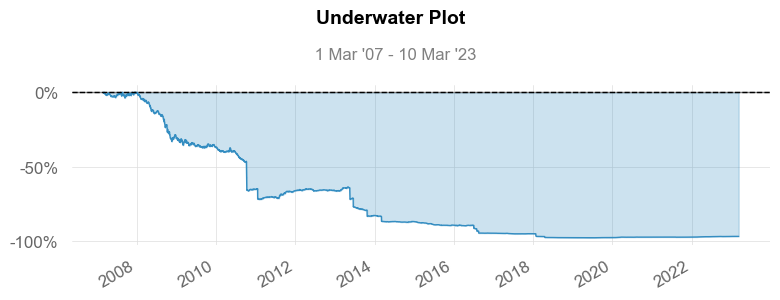

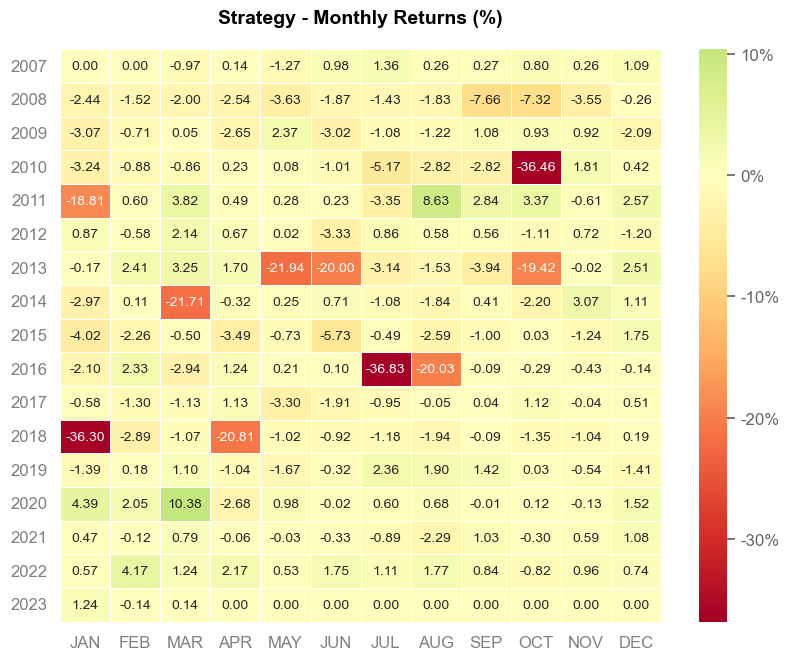

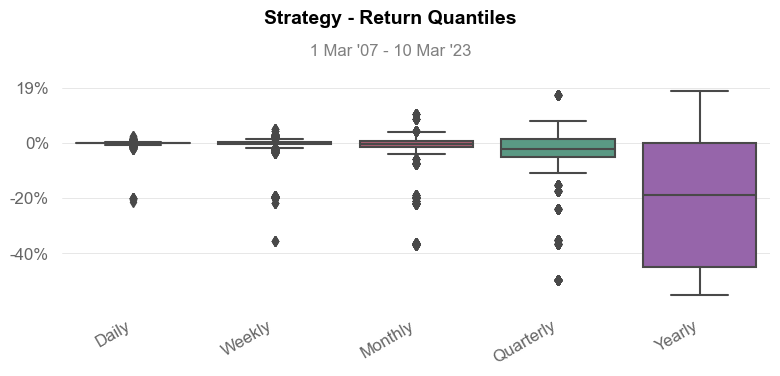

In [26]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [27]:
TF = 'H1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

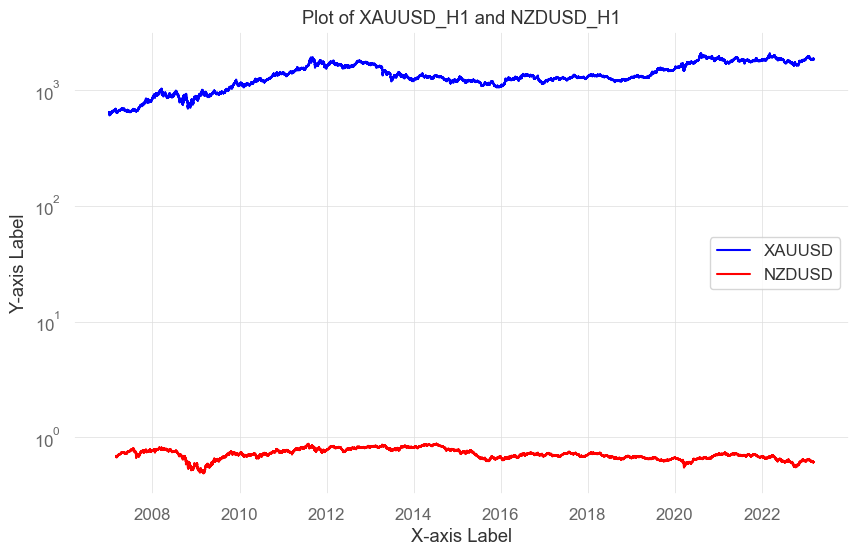

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1, data_2)

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          1.472e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:42:25   Log-Likelihood:                     -7.2788e+05
No. Observations:              100009   AIC:                                  1.456e+06
Df Residuals:                  100008   BIC:                                  1.456e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7693      1.534   1213.107      0.000    1857.763    1863.776
==============================================================================
Omnibus:                     1484.399   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.633
Skew:                           0.198   Prob(JB):                    2.15e-263
Kurtosis:                       2.635   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

### Save Result Backtest 

In [34]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [35]:
filename = f'{Currency_Pair}_{TF}.csv'

In [36]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -73.67%
CAGR﹪                     -5.58%

Sharpe                     -0.58
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.48
Sortino                    -0.59
Smart Sortino              -0.49
Sortino/√2                 -0.42
Smart Sortino/√2           -0.34
Omega                      0.73

Max Drawdown               -79.62%
Longest DD Days            5675
Volatility (ann.)          10.56%
Calmar                     -0.07
Skew                       -27.41
Kurtosis                   824.9

Expected Daily %           -0.03%
Expected Monthly %         -0.69%
Expected Yearly %          -7.55%
Kelly Criterion            -18.07%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.12%
Expected Shortfall (cVaR)  -1.12%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-08-27,2019-06-14,2023-03-10,5675,-79.619355,-79.463055
2,2007-03-30,2007-05-30,2007-08-23,147,-2.793111,-2.739903
3,2007-03-04,2007-03-04,2007-03-07,4,-0.676759,-0.154272
4,2007-03-15,2007-03-26,2007-03-26,12,-0.532126,-0.418315
5,2007-03-09,2007-03-09,2007-03-12,4,-0.261513,-0.101193


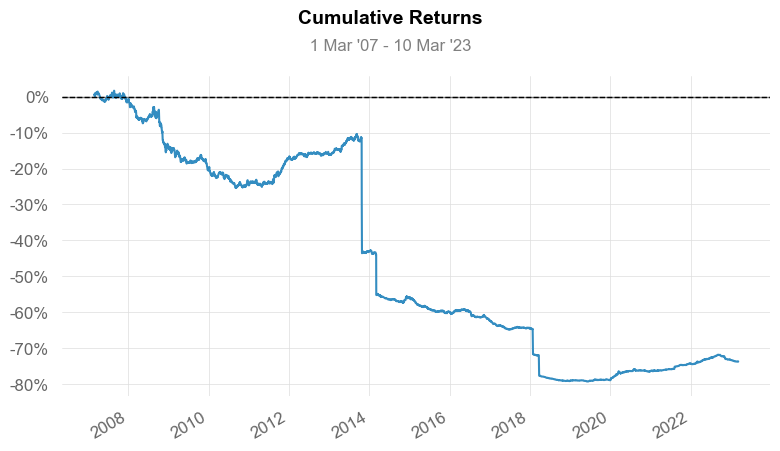

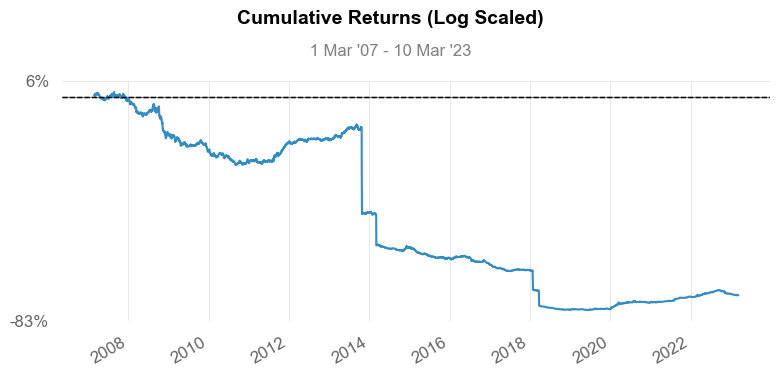

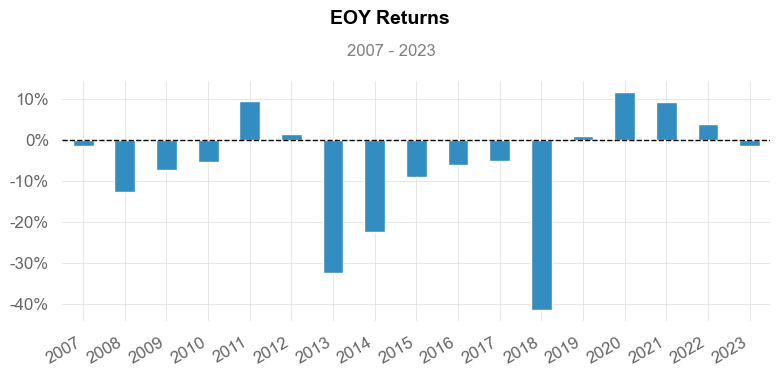

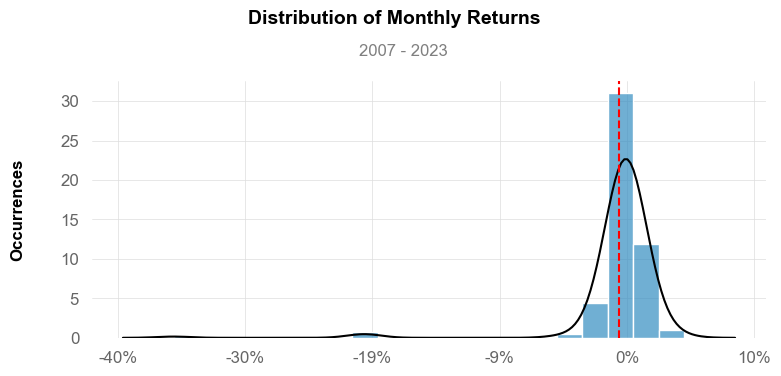

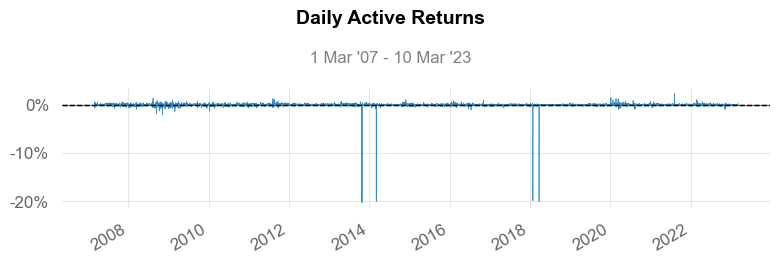

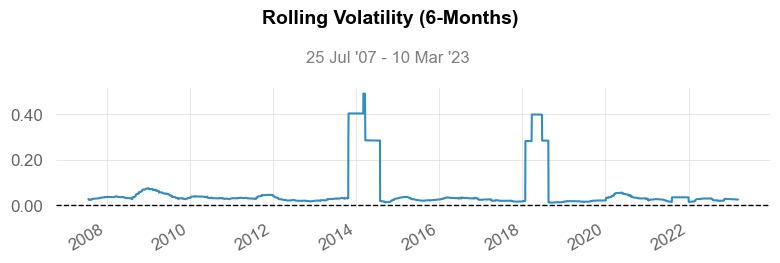

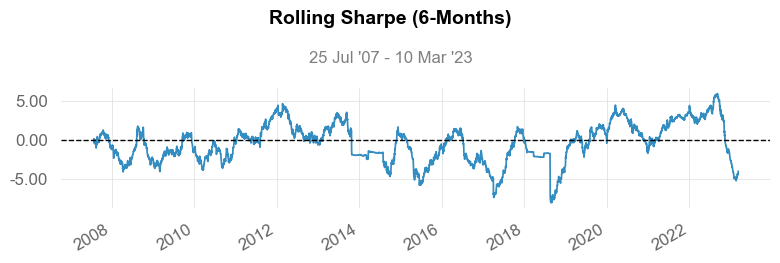

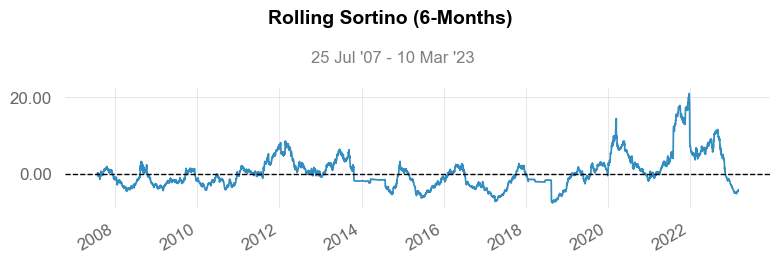

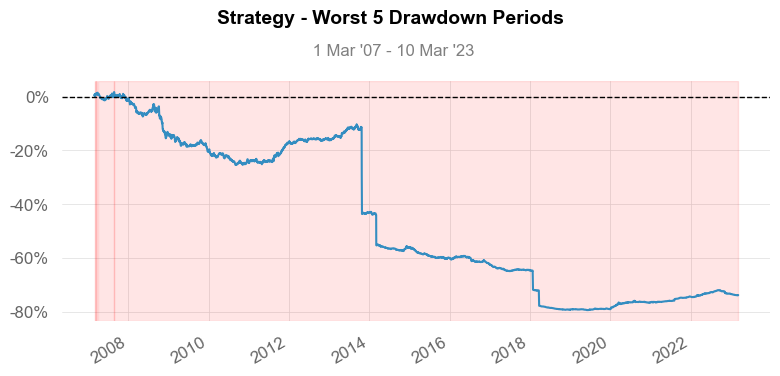

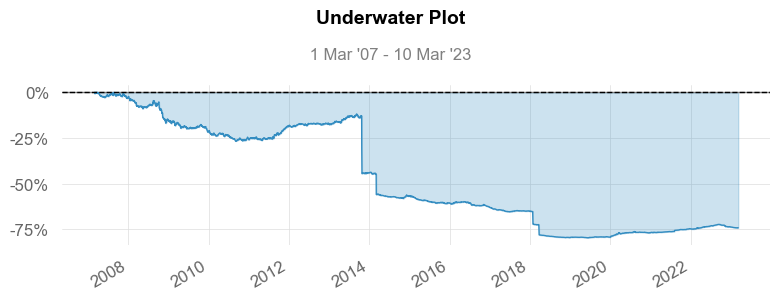

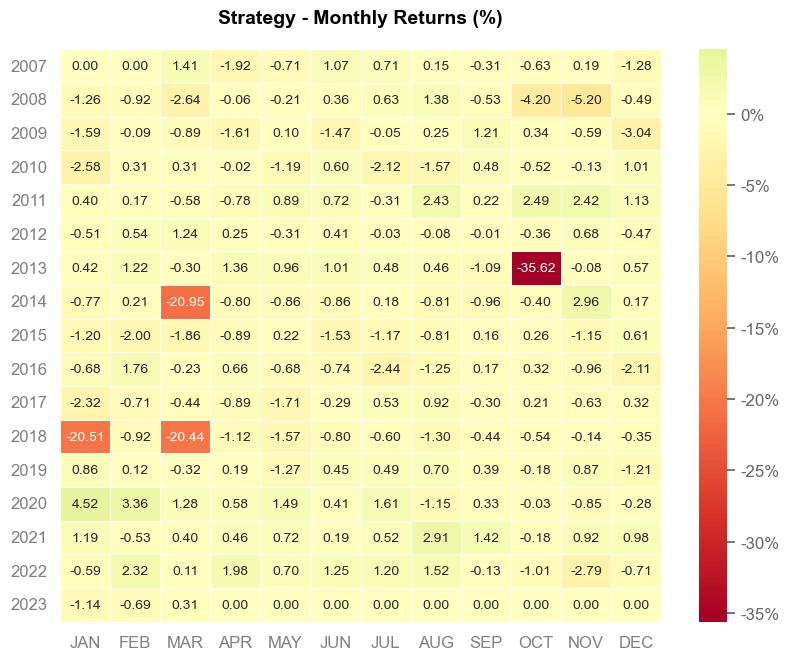

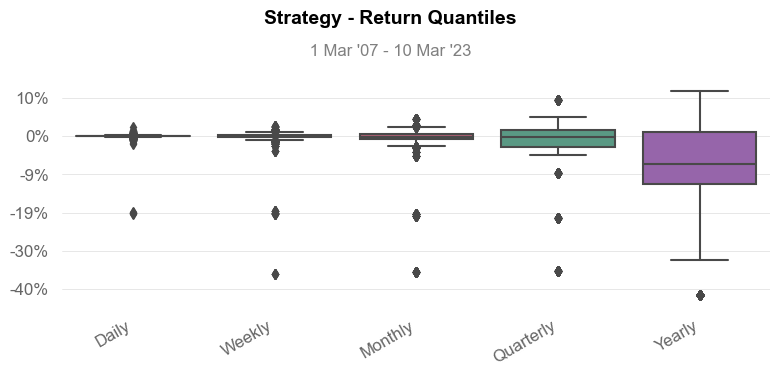

In [37]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [38]:
TF = 'M30'

In [39]:
data_1 = XAUUSD[TF]

In [40]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

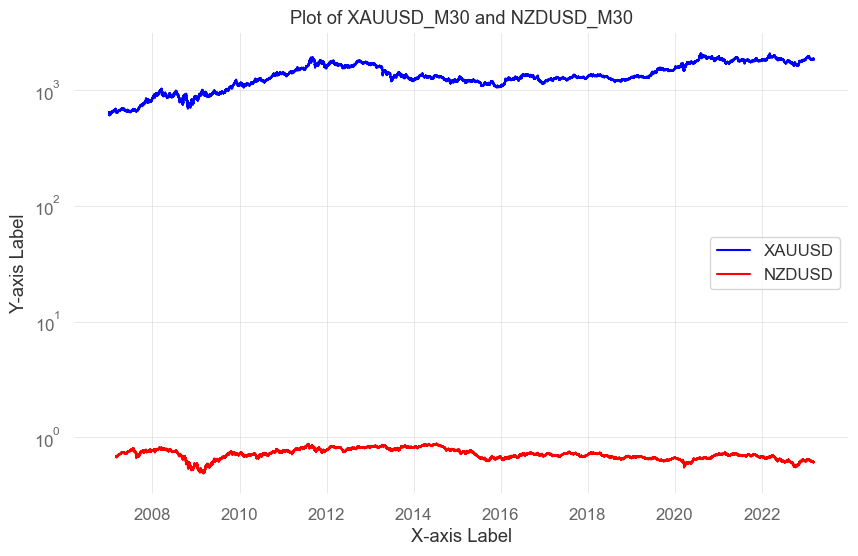

In [41]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [42]:
KF = Kalman_Filter(data_1, data_2)

In [43]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          2.943e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:58:05   Log-Likelihood:                     -1.4556e+06
No. Observations:              200000   AIC:                                  2.911e+06
Df Residuals:                  199999   BIC:                                  2.911e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.7369      1.085   1715.580      0.000    1858.611    1862.863
==============================================================================
Omnibus:                     2968.038   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2418.819
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       2.636   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result = KF.Run()

### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -72.59%
CAGR﹪                     -5.42%

Sharpe                     -0.51
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.44
Sortino                    -0.52
Smart Sortino              -0.44
Sortino/√2                 -0.37
Smart Sortino/√2           -0.31
Omega                      0.67

Max Drawdown               -78.33%
Longest DD Days            5675
Volatility (ann.)          11.23%
Calmar                     -0.07
Skew                       -27.34
Kurtosis                   773.34

Expected Daily %           -0.03%
Expected Monthly %         -0.67%
Expected Yearly %          -7.33%
Kelly Criterion            -24.73%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.19%
Expected Shortfall (cVaR)  -1.19%

Max Consec

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-08-27,2019-06-13,2023-03-10,5675,-78.332121,-78.170634
2,2007-03-14,2007-05-06,2007-07-26,135,-1.883941,-1.858060
3,2007-08-09,2007-08-15,2007-08-17,9,-0.839423,-0.456374
4,2007-08-03,2007-08-03,2007-08-03,1,-0.154081,NaN
5,2007-03-09,2007-03-09,2007-03-12,4,-0.148447,-0.049476


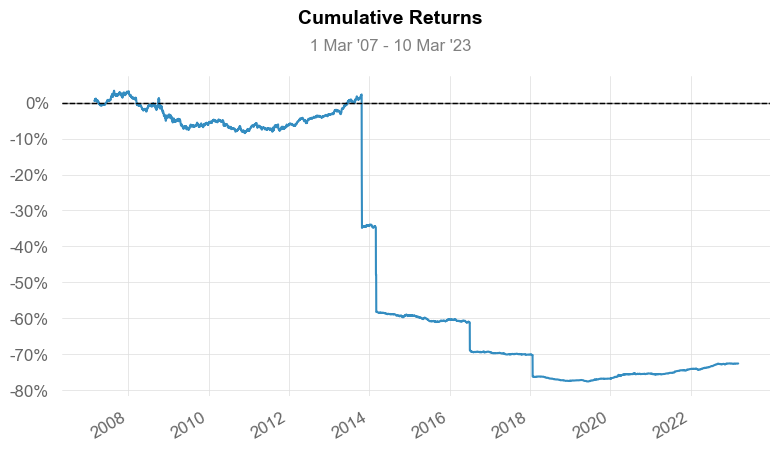

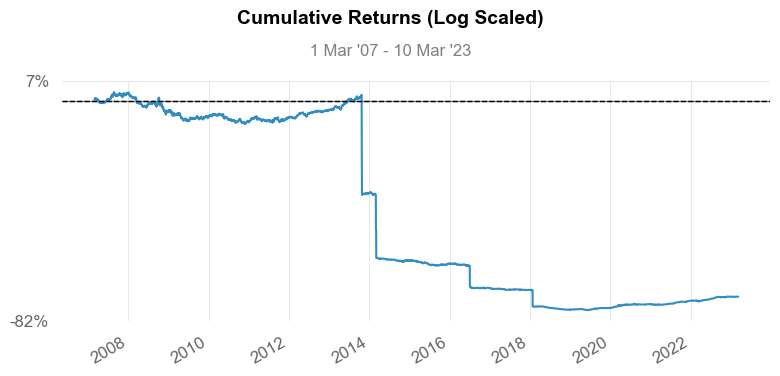

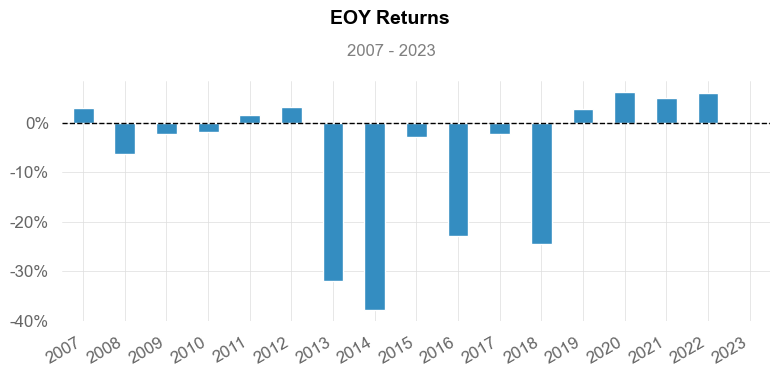

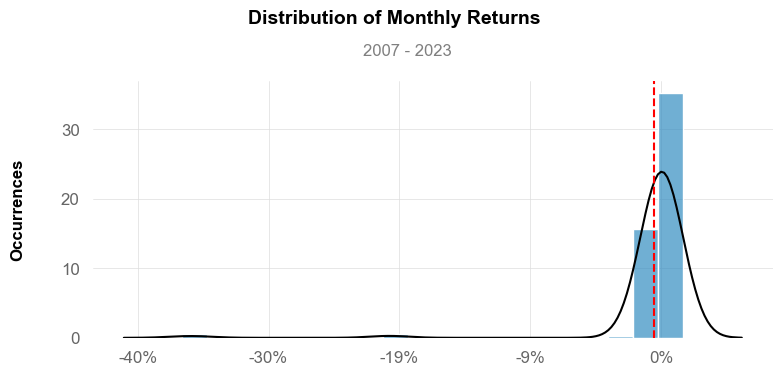

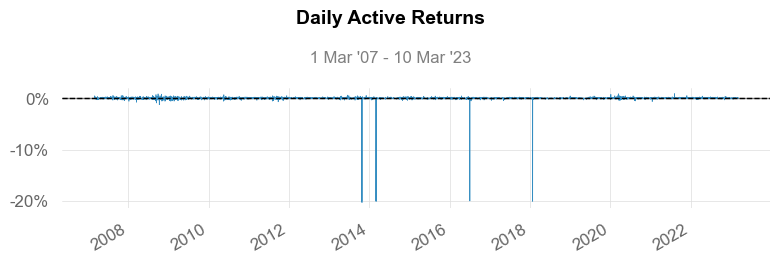

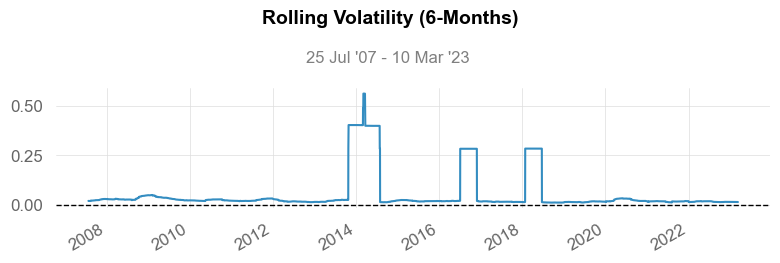

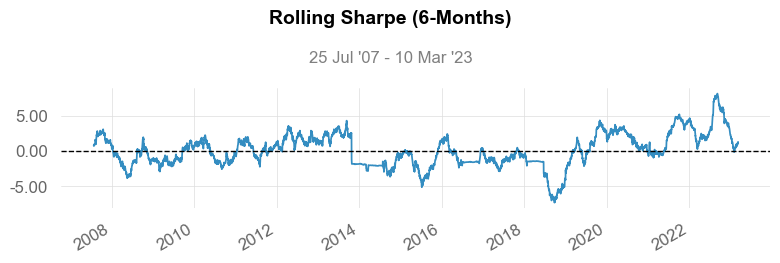

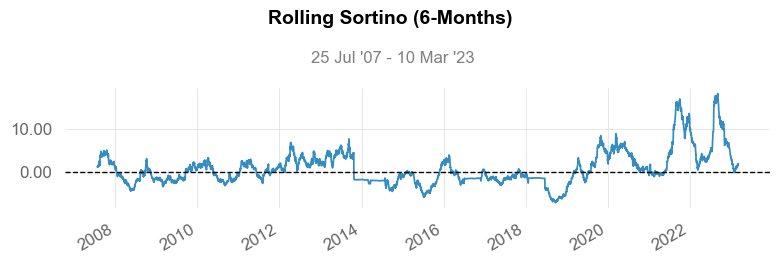

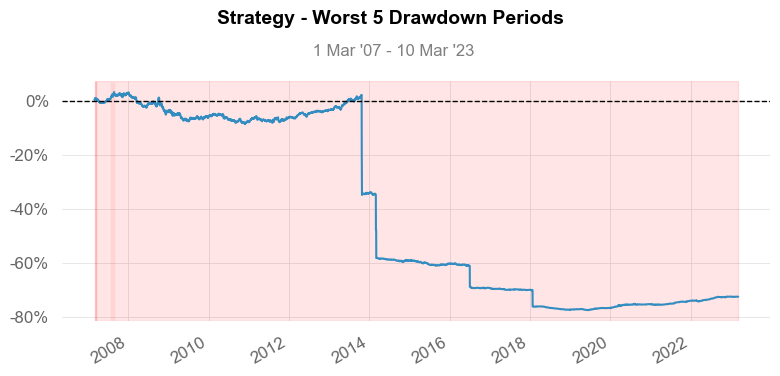

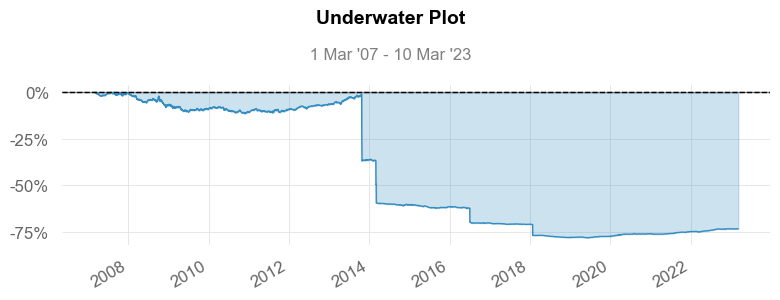

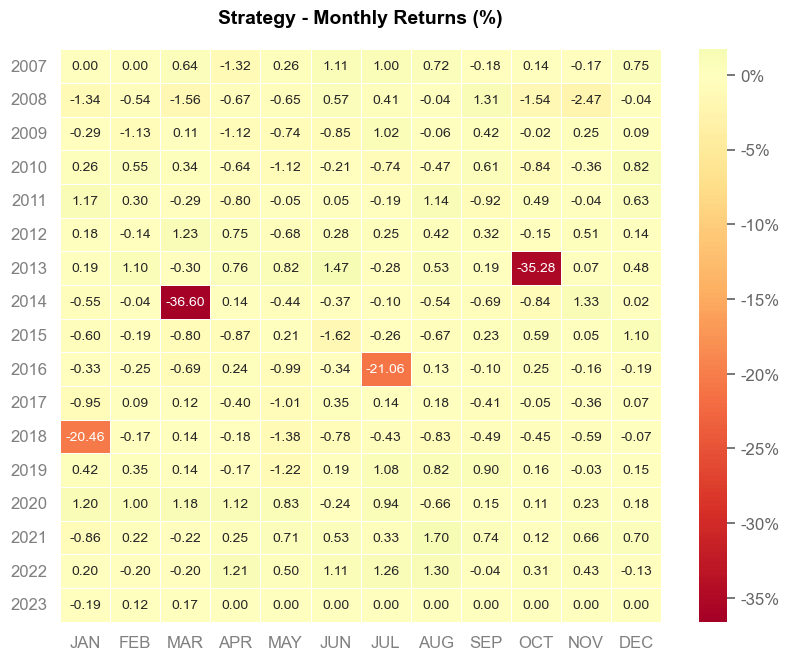

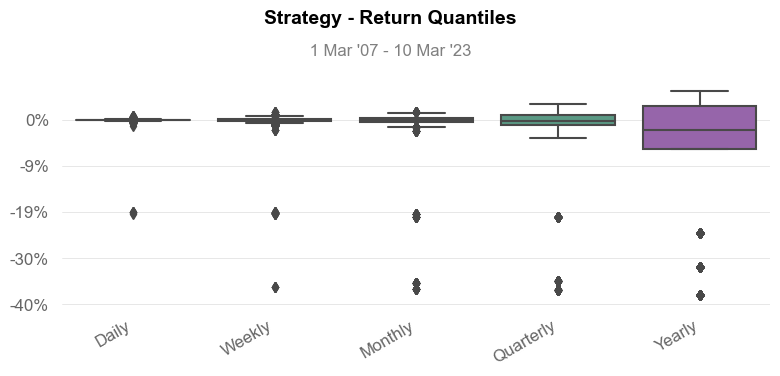

In [48]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())